In [1]:
import openmc
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import pandas as pd
import kdsource as kds
from mpl_toolkits.mplot3d import Axes3D as ax

In [2]:
openmc_data = "/home/agusgimenez/KD_OPMC/Secciones/endfb-vii.1-hdf5/cross_sections.xml"
os.environ["OPENMC_CROSS_SECTIONS"] = openmc_data
openmc.config['cross_sections'] = openmc_data

In [3]:
#MATERIALES





mat01 = openmc.Material(material_id=0) #agua
mat01.add_nuclide('H1',2.000,'ao')
mat01.add_nuclide('O16',0.9976,'ao')
mat01.add_nuclide('O17',0.00035,'ao')
mat01.add_s_alpha_beta('c_H_in_H2O')
mat01.set_density('g/cm3',1.00)


mat02 = openmc.Material(material_id=1)
mat02.add_nuclide('Cd106',1.22,'ao')
mat02.add_nuclide('Cd108',0.88,'ao')
mat02.add_nuclide('Cd110',12.39,'ao')
mat02.add_nuclide('Cd111',12.75,'ao')
mat02.add_nuclide('Cd112',24.07,'ao')
mat02.add_nuclide('Cd113',12.26,'ao')
mat02.add_nuclide('Cd114',28.86,'ao')
mat02.add_nuclide('Cd116',7.58,'ao')

mat02.set_density('g/cm3',8.65)


In [4]:
#PARAMETROS DE GEOMETRIAS

#bloque mat01
W =5.0 #semi-ancho
H =5.0 #semi-alto
L =1.0 #largo 

#bloque donde quiero ver la lista de particulas
angle = math.radians(30)

# #bloque mat02
# e_cd =1.0 #espesor
# w_cd =0.1 #ancho de cada bloque
# if w_cd>W/2:
#     exit


#FUENTE
R = 1.0

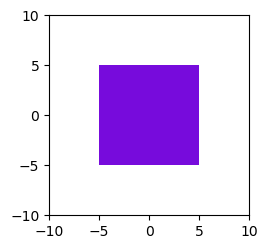

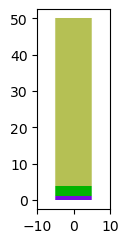

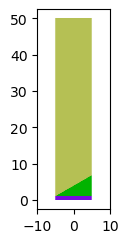

In [5]:
#GEOMETRIAS

#bloque mat01
surf1 = openmc.XPlane(-W)
surf1.boundary_type = 'vacuum'

surf6 = openmc.XPlane(W)
surf6.boundary_type = 'vacuum'

surf2 = openmc.YPlane(-H)
surf2.boundary_type = 'vacuum'

surf5 = openmc.YPlane(H)
surf5.boundary_type = 'vacuum'


surf3 = openmc.ZPlane(0)
surf3.boundary_type = 'vacuum'

surf4 = openmc.ZPlane(L)

surf7 = openmc.ZPlane(50*L)
surf7.boundary_type = 'vacuum'




cell01 = openmc.Cell(fill=mat01,cell_id=1)
cell01.region = +surf1 & -surf6 & +surf2 & -surf5 & +surf3 & -surf4


#source.hs
surf_source = openmc.Plane.from_points((-W,-H,L),(-W,H,L),(0.0,0.0,L+W*math.sin(angle)/math.cos(angle)))
cell02 = openmc.Cell(fill=None,cell_id=2)
cell02.region = +surf4 & +surf_source & +surf1 & -surf6 & +surf2 & -surf5


cell00 = openmc.Cell(fill=None,cell_id=0)
cell00.region = -surf7 & -surf_source & +surf1 & -surf6 & +surf2 & -surf5

univ01 = openmc.Universe(cells=[cell00,cell01, cell02],universe_id=1) 
univ01.plot(origin=(0.0,0.0,L/2),width=(4*W,4*W))
univ01.plot(origin=(0.0,0.0,50*L/2),width=(4*W,55*L),basis='yz')
univ01.plot(origin=(0.0,0.0,50*L/2),width=(4*W,55*L),basis='xz')


In [6]:
#FUENTE
S = openmc.Source()
S.particle = 'neutron'
#dist_espacial'

r = openmc.stats.PowerLaw(0.0,R,1.0)
phi = openmc.stats.Uniform(0.0 , 2*math.pi)
z = openmc.stats.Discrete(0.0 , 1.0)
S.space = openmc.stats.CylindricalIndependent(r,phi,z)

#dist_Energia
S.energy = openmc.stats.Discrete(30.0,1.0)

#dist_angular.

S.angle = openmc.stats.Monodirectional(reference_uvw=[0.0,0.0,1.0])

In [7]:
#Numero de particulas 
N = int(100)
#PARAMETROS DE EJECUCION
param = openmc.Settings()
param.source = S
param.run_mode = "fixed source"
param.batches = 1
param.particles = N

superficies = [surf_source.id,surf4.id,surf7.id]

param.surf_source_write = {
    'surface_ids': superficies,
    'max_particles': len(superficies)*N
}

param.max_tracks = N    


In [8]:
#GENERACION DE ARCHIVOS XML
geom = openmc.Geometry(univ01)
geom.export_to_xml()

mats = openmc.Materials(univ01.get_all_materials().values())
mats.cross_sections = openmc_data
mats.export_to_xml()

#hola

param.export_to_xml()



In [9]:
!rm statepoint.*.h5
!rm summary.h5
openmc.run(tracks=True)

rm: cannot remove 'statepoint.*.h5': No such file or directory
                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #####################

In [22]:
tracks = openmc.Tracks("tracks.h5").filter(particle='neutron')

tracks


[<Track (1, 1, 1): 1 particles>,
 <Track (1, 1, 2): 1 particles>,
 <Track (1, 1, 3): 1 particles>,
 <Track (1, 1, 4): 1 particles>,
 <Track (1, 1, 5): 1 particles>,
 <Track (1, 1, 6): 1 particles>,
 <Track (1, 1, 7): 1 particles>,
 <Track (1, 1, 8): 1 particles>,
 <Track (1, 1, 9): 1 particles>,
 <Track (1, 1, 10): 1 particles>,
 <Track (1, 1, 11): 1 particles>,
 <Track (1, 1, 12): 1 particles>,
 <Track (1, 1, 13): 1 particles>,
 <Track (1, 1, 14): 1 particles>,
 <Track (1, 1, 15): 1 particles>,
 <Track (1, 1, 16): 1 particles>,
 <Track (1, 1, 17): 1 particles>,
 <Track (1, 1, 18): 1 particles>,
 <Track (1, 1, 19): 1 particles>,
 <Track (1, 1, 20): 1 particles>,
 <Track (1, 1, 21): 1 particles>,
 <Track (1, 1, 22): 1 particles>,
 <Track (1, 1, 23): 1 particles>,
 <Track (1, 1, 24): 1 particles>,
 <Track (1, 1, 25): 1 particles>,
 <Track (1, 1, 26): 1 particles>,
 <Track (1, 1, 27): 1 particles>,
 <Track (1, 1, 28): 1 particles>,
 <Track (1, 1, 29): 1 particles>,
 <Track (1, 1, 30): 1 p

In [48]:
first_track = tracks[0]
first_track.particle_tracks
neutron = first_track[0]
neutron.states['r']
# first_track.plot()

array([( 0.06311684,  0.11341072, 0.        ),
       ( 0.06311684,  0.11341072, 0.07343395),
       (-0.01635864,  0.05884366, 0.16919146),
       (-0.21539229, -0.01303757, 0.06432252),
       (-0.2906547 , -0.09390077, 0.01302107),
       (-0.29135592, -0.09012047, 0.        )],
      dtype=[('x', '<f8'), ('y', '<f8'), ('z', '<f8')])